# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


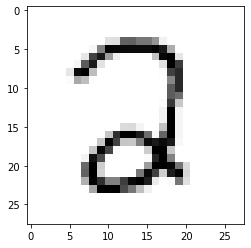

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2544
Training Accuracy: 0.5966, Testing Accuracy: 0.5927



Epoch 10, Loss 0.0998
Training Accuracy: 0.9069, Testing Accuracy: 0.9158



Epoch 20, Loss 0.0598
Training Accuracy: 0.9387, Testing Accuracy: 0.9491



Epoch 30, Loss 0.0461
Training Accuracy: 0.9484, Testing Accuracy: 0.9597



Epoch 40, Loss 0.0394
Training Accuracy: 0.9555, Testing Accuracy: 0.9667



Epoch 50, Loss 0.0353
Training Accuracy: 0.9604, Testing Accuracy: 0.9682



Epoch 60, Loss 0.0325
Training Accuracy: 0.9627, Testing Accuracy: 0.9708



Epoch 70, Loss 0.0305
Training Accuracy: 0.9645, Testing Accuracy: 0.9728



Epoch 80, Loss 0.0288
Training Accuracy: 0.9665, Testing Accuracy: 0.9733



Epoch 90, Loss 0.0275
Training Accuracy: 0.9680, Testing Accuracy: 0.9748



Epoch 100, Loss 0.0264
Training Accuracy: 0.9690, Testing Accuracy: 0.9743



Epoch 110, Loss 0.0254
Training Accuracy: 0.9699, Testing Accuracy: 0.9738



Epoch 120, Loss 0.0246
Training Accuracy: 0.9714, Testing Accuracy: 0.9718



Epoch 130, Loss 0.0238
Training Accuracy: 0.9725, Testing Accuracy: 0.9733



Epoch 140, Loss 0.0231
Training Accuracy: 0.9735, Testing Accuracy: 0.9743



Epoch 150, Loss 0.0225
Training Accuracy: 0.9743, Testing Accuracy: 0.9743



Epoch 160, Loss 0.0219
Training Accuracy: 0.9749, Testing Accuracy: 0.9748



Epoch 170, Loss 0.0213
Training Accuracy: 0.9755, Testing Accuracy: 0.9748



Epoch 180, Loss 0.0207
Training Accuracy: 0.9766, Testing Accuracy: 0.9748



Epoch 190, Loss 0.0202
Training Accuracy: 0.9774, Testing Accuracy: 0.9758



Epoch 200, Loss 0.0197
Training Accuracy: 0.9777, Testing Accuracy: 0.9763



Epoch 210, Loss 0.0192
Training Accuracy: 0.9790, Testing Accuracy: 0.9758



Epoch 220, Loss 0.0187
Training Accuracy: 0.9794, Testing Accuracy: 0.9758



Epoch 230, Loss 0.0183
Training Accuracy: 0.9796, Testing Accuracy: 0.9758



Epoch 240, Loss 0.0179
Training Accuracy: 0.9801, Testing Accuracy: 0.9768



0.02021697011655409

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2543
Training Accuracy: 0.6400, Testing Accuracy: 0.6426



Epoch 10, Loss 0.1024
Training Accuracy: 0.9099, Testing Accuracy: 0.9168



Epoch 20, Loss 0.0793
Training Accuracy: 0.9267, Testing Accuracy: 0.9375



Epoch 30, Loss 0.0685
Training Accuracy: 0.9341, Testing Accuracy: 0.9420



Epoch 40, Loss 0.0619
Training Accuracy: 0.9397, Testing Accuracy: 0.9511



Epoch 50, Loss 0.0574
Training Accuracy: 0.9440, Testing Accuracy: 0.9561



Epoch 60, Loss 0.054
Training Accuracy: 0.9468, Testing Accuracy: 0.9582



Epoch 70, Loss 0.0514
Training Accuracy: 0.9486, Testing Accuracy: 0.9587



Epoch 80, Loss 0.0494
Training Accuracy: 0.9503, Testing Accuracy: 0.9592



Epoch 90, Loss 0.0476
Training Accuracy: 0.9523, Testing Accuracy: 0.9587



Epoch 100, Loss 0.0462
Training Accuracy: 0.9540, Testing Accuracy: 0.9592



Epoch 110, Loss 0.0449
Training Accuracy: 0.9544, Testing Accuracy: 0.9602



Epoch 120, Loss 0.0439
Training Accuracy: 0.9548, Testing Accuracy: 0.9607



Epoch 130, Loss 0.0429
Training Accuracy: 0.9555, Testing Accuracy: 0.9612



Epoch 140, Loss 0.0421
Training Accuracy: 0.9562, Testing Accuracy: 0.9617



Epoch 150, Loss 0.0413
Training Accuracy: 0.9567, Testing Accuracy: 0.9622



Epoch 160, Loss 0.0406
Training Accuracy: 0.9573, Testing Accuracy: 0.9637



Epoch 170, Loss 0.04
Training Accuracy: 0.9579, Testing Accuracy: 0.9647



Epoch 180, Loss 0.0394
Training Accuracy: 0.9581, Testing Accuracy: 0.9647



Epoch 190, Loss 0.0389
Training Accuracy: 0.9586, Testing Accuracy: 0.9647



Epoch 200, Loss 0.0384
Training Accuracy: 0.9589, Testing Accuracy: 0.9652



Epoch 210, Loss 0.038
Training Accuracy: 0.9594, Testing Accuracy: 0.9652



Epoch 220, Loss 0.0376
Training Accuracy: 0.9596, Testing Accuracy: 0.9652



Epoch 230, Loss 0.0372
Training Accuracy: 0.9600, Testing Accuracy: 0.9657



Epoch 240, Loss 0.0368
Training Accuracy: 0.9604, Testing Accuracy: 0.9662



0.007598556060489499

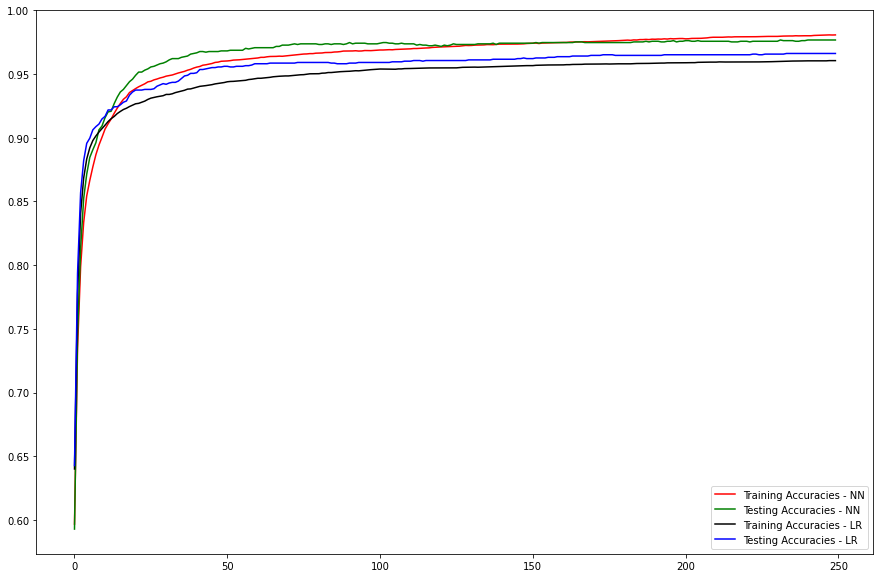

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

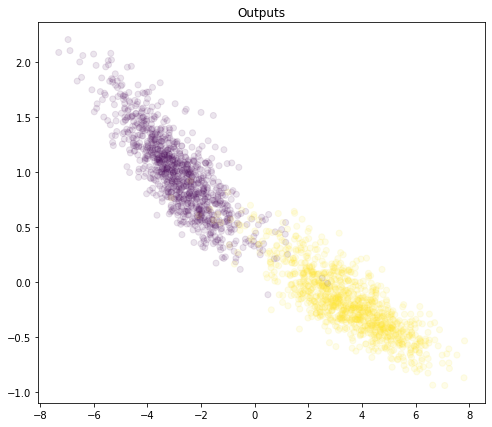

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

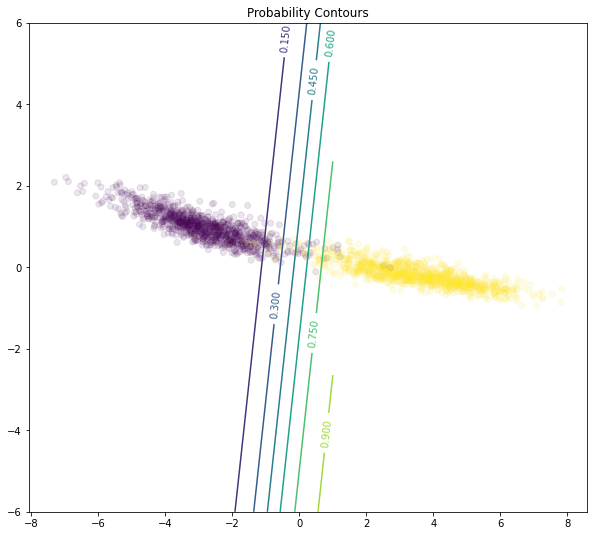

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );